In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #랜덤 포레스트 

In [3]:
iris = datasets.load_iris()

In [20]:
#X와 Y 데이터 설정
X = pd.DataFrame(iris.data, columns=iris.feature_names) #X
Y = pd.DataFrame(iris.target) #setosa', 'versicolor', 'virginica'

In [21]:
train_X, val_X, train_y, val_y = train_test_split(X, Y, test_size=0.01 ,random_state=1) 

In [22]:
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [47]:
pd.concat([val_X, val_y], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1


In [57]:
import shap #shap값을 보기 위해.

#첫 데이터는 setosa인데 변수들이 어떤 협의에 걸쳐 setosa로 분류 되었는지 확인.
row_to_show = 0


data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# SHAP value 계산을 위해 Tree전용 으로 설정한다.
explainer = shap.TreeExplainer(my_model)

# Shap value 계산
shap_values = explainer.shap_values(data_for_prediction)

#내 모델의 아웃 풋
my_model.predict_proba(data_for_prediction_array)
#[[0, 1]]
#--> [[ setosa가 아닌 확률은 0% , setosa일 확률을 100%로 예측 ]]

array([[1., 0., 0.]])

# binary class와 마찬가지로, 
multi class에서 shap_values는 3개의 값을 동시에 return합니다.<br/>

모델의 최종 예측 확률은 다음과 같이 나오고
 
 ---
 ```python
 Species: 'setosa', 'versicolor', 'virginica'
 prob:       1.0         0.0           0.0
 ```
 ----

각각의 확률이 어떻게 나오게 됬는지 SHAP value로 설명합니다. 


```python 
array([-0.03512584, 0.06158033, 0.18558728, 0.46498525])
array([ 0.04499059, -0.04055248, -0.06407669, -0.27076682])
array([-0.00986475, -0.02102785, -0.12151059, -0.19421843])
```

# 모델의 Expected prob

<span style="color:red"><strong>binary class<strong></span>에서 모델의 base line은 크게 살펴보지 않았습니다. 
왜냐하면, (True)라고 예측한 결과만 활용 했기 때문입니다.

하지만, multiclass에서는 각 Class에 대한 Base line을 각기 다르게 적용해야 합니다.
(아래 그림 참조)

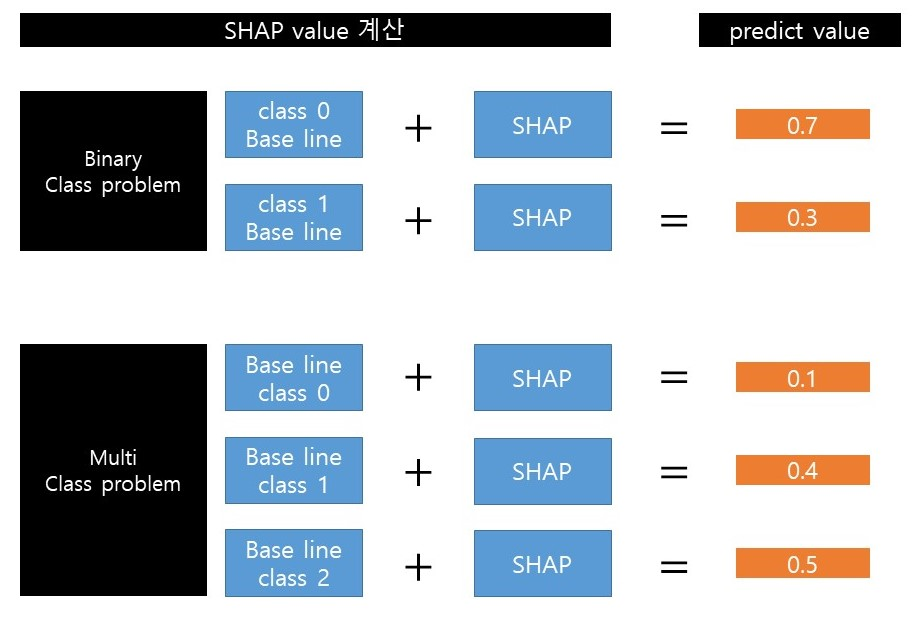

In [75]:
from IPython.display import Image
PATH = "C:\\Users\\LG\\Desktop\\"
Image(filename = PATH + "SHAP_20181012.jpg")

In [68]:
#모델의 Base 기댓값. 여기서 부터 
#각 변수의 역할을 살펴 볼 수 있다.
explainer.expected_value[0]

0.32297297297297295

In [69]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

## <strong>Setosa</strong>

14번 데이터는(0번재 val_X) 다음과 같은 특징을 가지고 있습니다.<br/>
sepal length (cm)    5.8<br/>
sepal width (cm)     4.0<br/>
petal length (cm)    1.2<br/>
petal width (cm)     0.2<br/>



모델의 Base = 0.323 에서 각각의 feature들이 어떤 작용을 했는지 살펴 보겠습니다.

1) Sepal.length = 5.8 의 역할은  <strong><span style="color:blue">SHAP= -0.035</span></strong> 이므로, Setosa라고 예측하는데 negative한 영향을 주었습니다.<br/>
2) Sepal.width  = 4.0 의 역할은 SHAP= 0.061 로, Setosa라고 예측하는데 positive한 영향을 주었습니다.<br/>
3) Petal.length = 1.2 의 역할은 SHAP= 0.185 로, Setosa라고 예측하는데 positive한 영향을 주었습니다.<br/>
4) Petal.width  = 0.2 의 역할은  <strong><span style="color:red">SHAP= 0.465</span></strong> 로, Setosa라고 예측하는데 positive한 영향을 주었습니다.(매우 많이)

SHAP value의 합은 0.677 이므로 최종 예측 값은<br/><br/>
Base (0.323) + SHAP (0.677) = 1 로 예측합니다.

In [70]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

## <strong>Versicolor</strong>

14번 데이터는(0번재 val_X) 


모델의 Base = 0.330 에서 각각의 feature들이 어떤 작용을 했는지 살펴 보겠습니다.

1) Sepal.length = 5.8 의 역할은  <strong><span style="color:blue">SHAP= 0.044</span></strong> 이므로, versicolor 라고 예측하는데 positive 영향을 주었습니다.<br/>
2) Sepal.width  = 4.0 의 역할은 SHAP= -0.040 로, versicolor라고 예측하는데 negative한 영향을 주었습니다.<br/>
3) Petal.length = 1.2 의 역할은 SHAP= -0.064 로, versicolor라고 예측하는데 negative한 영향을 주었습니다.<br/>
4) Petal.width  = 0.2 의 역할은  <strong><span style="color:red">SHAP= -0.270</span></strong> 로, versicolor 라고 예측하는데 negative한 영향을 주었습니다.(매우 많이)

SHAP value의 합은 -0.330 이므로 최종 예측 값은<br/><br/>
Base (0.330) + SHAP (-0.330) = 0 로 예측합니다.